# **Análisis de resultados escolares con reducción de la dimensionalidad y agrupamiento**

### Julian Esteban Carvajal Ramírez 1001774262
### Wilfer Mauricio Chavarría Jaramillo 1035833003
### Alejandro Bedoya Taborda 1152226157

# **REPORTE TÉCNICO**

**INTRODUCCIÓN**


El Departamento de Educación de los Estados Unidos pone a disposición del público general información de las escuelas públicas y privadas del país, datos como localización, número de campus y si es campus principal, nivel de perfil de grado de la escuela, tipo de título que ofrece la escuela, tasa de finalización y transferencias, entre otros, esto para tomar mejores decisiones al momento de elegir una institución donde se desea estudiar y aumentar la tasa de graduados para las poblaciones más desfavorecidas.

**OBJETIVO**

Analizar los datos suministrados y realizar el debido preprocesamiento para su posterior análisis.
Desarrollar un agrupamiento de instituciones de educación superior dependiendo de qué variables tienen mayor correlación entre sí.
Caracterizar cada grupo y analizar las variables más significativas de cada grupo
Entender qué hace que un grupo sea una buena opción
Proponer cómo se podría generar un conjunto de datos que permita hacer lo mismo para Colombia a partir de la información disponible y de otra que se deba recaudar.

**BASE DE DATOS.**

Se toma la base de datos CollegeScorecard.csv suministrada por el Departamento de Educación de Estados Unidos () publicada en el portal educativo https://data.world (https://data.world/exercises/cluster-analysis-exercise-2), ademas se tomo de la pagina oficial del Centro Nacional de Estadística Educativa de Estados unidos (NCES, por sus siglas en ingles) la clasificación de los programas de instruccion y asi poder entender las variables columnas de la base de datos antes mencionada (https://nces.ed.gov/ipeds/cipcode/browse.aspx?y=56 ).

**DESCRIPCIÓN TÉCNICA**

Se realiza un preprocesamiento de la base de datos para realizar el correcto análisis, los pasos realizados son:
- Se verifica el número de columnas que tiene la base de datos y eliminan aquellas duplicadas y las que tiene más del 30% de de datos como nulos.
- Se procede a buscar las columnas con valores categóricos como o son booleanos  y columnas con 3 valores únicos, esto para confirmar manualmente con el diccionario de datos si las variables son categóricas y se procede a eliminarlas.
- Por último se eliminan las variables cualitativas restantes, esto porque no se puede establecer una estadística confiable de ellas.

Al finalizar el preprocesamiento de datos quedan un total de 130 variables con las cuales se procede con la reducción de dimensión, pero antes de ello se cambian las columnas que contienen valores NaN por el promedio general de toda la variable para no afectar la reducción de dimensión.

Luego de realizar este preprocesamiento de datos, se grafican las escuelas en un mapa para verificar si la ubicación es relevante en el análisis, esto se puede observar en el apartado de VISUALIZACIÓN GEOGRÁFICA, después de realizar la reducción de dimensión empleando la factorización de la matriz no negativa obtenemos los datos sufusiones para emplear el Método del codo (Elbow Method) para determinar el número de componentes según el punto en donde la diferencia entre los valores comience a ser menos significativa (Donde la curva es más suave), Determinando así el usar 4 componentes para la función NMF.

Las 130 columnas se encuentran ahora representadas por 4 componentes principales que además están estandarizados. Se aplica de nuevo el Método del codo para determinar el número óptimo de clusters y haciendo uso de la librería Kmeans y variando nuevamente el número de componentes, Nuevamente se encuentra que el número óptimo y apropiado para el número de clusters es 6 que es dónde la gráfica se suaviza casi en su totalidad, además es pertinente elegir este valor y no el 4 debido a la gran cantidad de datos a representar.

Se aplica el Cluster y después de obtener estos resultados, se realiza de nuevo una visualización geográfica donde se puede verificar que la localización no es una variable significativa en este modelo.

Por último se realiza una caracterización de cada cluster donde se observa cuales son las variables más significativas en cada uno de ellos




# Importes

In [ ]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 863 kB 13.8 MB/s 
     |████████████████████████████████| 30.5 MB 84.4 MB/s 
     |████████████████████████████████| 219 kB 60.5 MB/s 
     |████████████████████████████████| 6.3 MB 36.6 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=6550e1f368928b64054b8af87dc9621652e7ce16c617a656087b7778866f3176
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, NMF
from sklearn import metrics
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = pathlib.Path('/content/drive/Shareddrives/Tecnicas de aprendizaje estadistico/Entrega 3')
list(data_path.glob('*.csv'))

[PosixPath('/content/drive/Shareddrives/Tecnicas de aprendizaje estadistico/Entrega 3/collegescorecard.csv'),
 PosixPath('/content/drive/Shareddrives/Tecnicas de aprendizaje estadistico/Entrega 3/bd_red.csv')]

In [ ]:
data = pd.read_csv(data_path.joinpath('collegescorecard.csv'))
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,9,26,27,28,29,30,31,32,33,34,289,1427,1542,1561,1575,1725) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,unitid,opeid,opeid6,instnm,city,stabbr,zip,accredagency,insturl,npcurl,...,noncom_rpy_3yr_rt_supp,dep_rpy_3yr_rt_supp,ind_rpy_3yr_rt_supp,pell_rpy_3yr_rt_supp,nopell_rpy_3yr_rt_supp,female_rpy_3yr_rt_supp,male_rpy_3yr_rt_supp,firstgen_rpy_3yr_rt_supp,notfirstgen_rpy_3yr_rt_supp,location
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283,POINT(-86.5685 34.7834)
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771,POINT(-86.8092 33.5022)
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65,POINT(-86.174 32.3626)
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667,POINT(-86.6384 34.7228)
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.334633385,POINT(-86.2957 32.3643)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,157107,1571,Georgia Military College-Columbus Campus,Columbus,GA,31909,NaN,http://columbus.gmc.cc.ga.us/,NaN,...,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871,NaN
7800,48285704,157101,1571,Georgia Military College-Valdosta Campus,Valdosta,GA,31605,NaN,http://valdosta.gmc.cc.ga.us/,NaN,...,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871,NaN
7801,48285705,157105,1571,Georgia Military College-Warner Robins Campus,Warner Robins,GA,31093,NaN,http://robins.gmc.cc.ga.us/,NaN,...,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871,NaN
7802,48285706,157100,1571,Georgia Military College-Online,Milledgeville,GA,31061,NaN,http://online.gmc.cc.ga.us/,NaN,...,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871,NaN


# Preprocesamiento

Se saca información de la tabla para saber cuántas columnas tiene, cuáles y cuántas no nulos tiene cada columna.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7804 entries, 0 to 7803
Columns: 1726 entries, unitid to location
dtypes: bool(3), float64(1529), int64(9), object(185)
memory usage: 102.6+ MB


La tabla tiene demasiadas columnas, así que primera se borran las columnas duplicadas y con más de 30% de valores como nulos

In [ ]:
data= data.drop_duplicates()
data= data.replace(to_replace="PrivacySuppressed", value=np.nan)
data.dropna(thresh = data.shape[0]*0.7, how = 'all', axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7804 entries, 0 to 7803
Columns: 352 entries, unitid to location
dtypes: bool(3), float64(250), int64(9), object(90)
memory usage: 20.9+ MB


Ahora buscamos las columnas categóricas.
El primer ejemplo de estas son las de tipo booleano o su equivalente que posee únicamente 2 valores únicos.

In [ ]:
catbool = data.dtypes[data.dtypes=='bool']
catbool

hcm2        bool
main        bool
curroper    bool
dtype: object

In [ ]:
data.drop(columns= catbool.index,inplace= True)

In [ ]:
cat2 = data.nunique()[data.nunique()==2]

In [ ]:
data.drop(columns= cat2.index,inplace= True)

In [ ]:
data.shape

(7804, 336)

A continuación busquemos en las columnas con 3 valores unicos

In [ ]:
cat3 = data.nunique()[data.nunique()==3]
cat3

control       3
cip01cert1    3
cip01cert2    3
cip01assoc    3
cip01cert4    3
             ..
cip54cert1    3
cip54cert2    3
cip54assoc    3
cip54cert4    3
cip54bachl    3
Length: 190, dtype: int64

Debido a que es una cantidad considerable de columnas, las mostramos todas y comparamos con el diccinario de datos del Dataset para confirmar si son categóricas y procedemos a eliminarlas.

In [ ]:
cat3.index[:50]

Index(['control', 'cip01cert1', 'cip01cert2', 'cip01assoc', 'cip01cert4',
       'cip01bachl', 'cip03cert1', 'cip03cert2', 'cip03assoc', 'cip03cert4',
       'cip03bachl', 'cip04cert1', 'cip04cert2', 'cip04assoc', 'cip04cert4',
       'cip04bachl', 'cip05cert1', 'cip05cert2', 'cip05assoc', 'cip05cert4',
       'cip05bachl', 'cip09cert1', 'cip09cert2', 'cip09assoc', 'cip09cert4',
       'cip09bachl', 'cip10cert1', 'cip10cert2', 'cip10assoc', 'cip10cert4',
       'cip10bachl', 'cip11cert1', 'cip11cert2', 'cip11assoc', 'cip11cert4',
       'cip11bachl', 'cip12cert1', 'cip12cert2', 'cip12assoc', 'cip12cert4',
       'cip12bachl', 'cip13cert1', 'cip13cert2', 'cip13assoc', 'cip13cert4',
       'cip13bachl', 'cip14cert1', 'cip14cert2', 'cip14assoc', 'cip14cert4'],
      dtype='object')

In [ ]:
cat3.index[50:100]

Index(['cip14bachl', 'cip15cert1', 'cip15cert2', 'cip15assoc', 'cip15cert4',
       'cip15bachl', 'cip16cert1', 'cip16cert2', 'cip16assoc', 'cip16cert4',
       'cip16bachl', 'cip19cert1', 'cip19cert2', 'cip19assoc', 'cip19cert4',
       'cip19bachl', 'cip22cert1', 'cip22cert2', 'cip22assoc', 'cip22cert4',
       'cip22bachl', 'cip23cert1', 'cip23cert2', 'cip23assoc', 'cip23cert4',
       'cip23bachl', 'cip24cert1', 'cip24cert2', 'cip24assoc', 'cip24cert4',
       'cip24bachl', 'cip25cert1', 'cip25cert2', 'cip25assoc', 'cip25cert4',
       'cip25bachl', 'cip26cert1', 'cip26cert2', 'cip26assoc', 'cip26cert4',
       'cip26bachl', 'cip27cert1', 'cip27cert2', 'cip27assoc', 'cip27cert4',
       'cip27bachl', 'cip29cert1', 'cip29cert2', 'cip29assoc', 'cip29bachl'],
      dtype='object')

In [ ]:
cat3.index[100:150]

Index(['cip30cert1', 'cip30cert2', 'cip30assoc', 'cip30cert4', 'cip30bachl',
       'cip31cert1', 'cip31cert2', 'cip31assoc', 'cip31cert4', 'cip31bachl',
       'cip38cert1', 'cip38cert2', 'cip38assoc', 'cip38cert4', 'cip38bachl',
       'cip39cert1', 'cip39cert2', 'cip39assoc', 'cip39cert4', 'cip39bachl',
       'cip40cert1', 'cip40cert2', 'cip40assoc', 'cip40cert4', 'cip40bachl',
       'cip41cert1', 'cip41cert2', 'cip41assoc', 'cip41cert4', 'cip41bachl',
       'cip42cert1', 'cip42cert2', 'cip42assoc', 'cip42cert4', 'cip42bachl',
       'cip43cert1', 'cip43cert2', 'cip43assoc', 'cip43cert4', 'cip43bachl',
       'cip44cert1', 'cip44cert2', 'cip44assoc', 'cip44cert4', 'cip44bachl',
       'cip45cert1', 'cip45cert2', 'cip45assoc', 'cip45cert4', 'cip45bachl'],
      dtype='object')

In [ ]:
cat3.index[150:]

Index(['cip46cert1', 'cip46cert2', 'cip46assoc', 'cip46cert4', 'cip46bachl',
       'cip47cert1', 'cip47cert2', 'cip47assoc', 'cip47cert4', 'cip47bachl',
       'cip48cert1', 'cip48cert2', 'cip48assoc', 'cip48cert4', 'cip48bachl',
       'cip49cert1', 'cip49cert2', 'cip49assoc', 'cip49cert4', 'cip49bachl',
       'cip50cert1', 'cip50cert2', 'cip50assoc', 'cip50cert4', 'cip50bachl',
       'cip51cert1', 'cip51cert2', 'cip51assoc', 'cip51cert4', 'cip51bachl',
       'cip52cert1', 'cip52cert2', 'cip52assoc', 'cip52cert4', 'cip52bachl',
       'cip54cert1', 'cip54cert2', 'cip54assoc', 'cip54cert4', 'cip54bachl'],
      dtype='object')

Luego de haber buscado manualmente, vemos que todas estas columnas san categoricas y procedemos a eliminarlas del Dataset

In [ ]:
data.drop(columns= cat3.index,inplace= True)

Por último miramos las columnas con un número de valores únicos pequeños (< 10)

In [ ]:
catmen10 = data.nunique()[data.nunique() < 10]
catmen10

preddeg    5
highdeg    5
dtype: int64

In [ ]:
data.drop(columns= catmen10.index,inplace= True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7804 entries, 0 to 7803
Columns: 144 entries, unitid to location
dtypes: float64(58), int64(6), object(80)
memory usage: 8.6+ MB


In [ ]:
data.columns

Index(['unitid', 'opeid', 'opeid6', 'instnm', 'city', 'stabbr', 'zip',
       'accredagency', 'insturl', 'npcurl',
       ...
       'compl_rpy_3yr_rt_supp', 'noncom_rpy_3yr_rt_supp',
       'dep_rpy_3yr_rt_supp', 'ind_rpy_3yr_rt_supp', 'pell_rpy_3yr_rt_supp',
       'nopell_rpy_3yr_rt_supp', 'female_rpy_3yr_rt_supp',
       'firstgen_rpy_3yr_rt_supp', 'notfirstgen_rpy_3yr_rt_supp', 'location'],
      dtype='object', length=144)

In [ ]:
data.location

0       POINT(-86.5685 34.7834)
1       POINT(-86.8092 33.5022)
2        POINT(-86.174 32.3626)
3       POINT(-86.6384 34.7228)
4       POINT(-86.2957 32.3643)
                 ...           
7799                        NaN
7800                        NaN
7801                        NaN
7802                        NaN
7803                        NaN
Name: location, Length: 7804, dtype: object

In [ ]:
# Borraremos las filas que no tengan localización
data.dropna(subset= ['location'], how = 'all', axis = 0, inplace = True)

In [ ]:
# Dataset que se usará próximamente para la geolocalización
data_cualit = data[['instnm', 'latitude', 'longitude']]

In [ ]:
data.drop(columns=['unitid', 'opeid', 'opeid6', 'instnm', 'city','stabbr', 'zip', 'accredagency', 'insturl', 'npcurl', 'st_fips','latitude', 'longitude', 'location' ],inplace=True)

Por último borramos las variables cualitativas restantes.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7019 entries, 0 to 7038
Columns: 130 entries, numbranch to notfirstgen_rpy_3yr_rt_supp
dtypes: float64(56), int64(2), object(72)
memory usage: 7.0+ MB


Quedamos con un número de 130 columnas para proceder con la reducción de dimensión y el agrupamiento, pero antes de esto es necesario tratar con los NaN, las columnas que contienen valores NaN son:

In [ ]:
null_val= data.isnull().sum()[data.isnull().sum()>0]
null_val.count()

128

Las llenamos remplazando NaN por la media de cada columna como se muestra a continuación y con esto terminamos el preprocesamiento.

---



In [ ]:
col= null_val.index
for i in col:
    medians= data[i].median()
    data[i]= data[i].fillna(value=medians)

# Visualización geográfica

Mostraremos un subconjunto de 500 instituciones

In [ ]:
subset = data_cualit.sample(n = 500)
subset

,instnm,latitude,longitude
605,Denver Seminary,39.6006,-105.0224
2922,Hebrew Union College-Jewish Institute of Religion,40.7289,-73.9945
1757,Roxbury Community College,42.3297,-71.0954
1248,Purdue University-North Central Campus,41.5838,-86.8952
685,Quinnipiac University,41.4195,-72.8955
...,...,...,...
878,Interactive College of Technology-Morrow,33.5723,-84.3361
1548,Xavier University of Louisiana,29.9642,-90.1073
5011,University of Phoenix-Las Vegas Campus,36.1792,-115.2557
4646,Cleveland Institute of Dental-Medical Assistan...,41.7149,-81.3419


In [ ]:
map = folium.Map(location = [subset['latitude'].mean()	, subset['longitude'].mean()], tiles="Stamen Terrain", zoom_start=4)

for row in subset.itertuples():
  map.add_child(folium.Marker(location = [row.latitude, row.longitude], popup = row.instnm))
map

Al hacer click en el marcador podemos observar el nombre de la institución.

# Reducción de dimensión

Emplearemos la Factorización de la matriz no negativa (NMF).

Encuentra dos matrices no negativas (W,H) cuyo producto se aproxima a la matriz no negativa X.Esta factorización puede utilizarse,por ejemplo,para la reducción de la dimensionalidad,la separación de fuentes o la extracción de temas.

Lo primero será determinar el número de componentes adecuado para representar los datos, para esto usaremos la función NMF de sklearn variando dicho número de componentes y por medio de una función miraremos para cada número qué porcentaje de los datos iniciales representa.

In [ ]:
# La función get_score nos proporciona la cantidad de datos que la nmf representa

def get_score(model, data, scorer = metrics.explained_variance_score):
    prediction = model.inverse_transform(model.transform(data))
    return scorer(data, prediction)

In [ ]:
# El NMF no permite entradas negativas, así que no centro los datos
scaler = StandardScaler(with_mean=False).fit(data)
X_train_sc = scaler.transform(data)

ks = [i for i in range(1,11)]
perfs_train = []
perfs_test = []
for k in ks:
    nmf = NMF(n_components=k).fit(X_train_sc)
    perfs_train.append(get_score(nmf, X_train_sc))

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr

In [ ]:
perfs_train

[0.0671909740753069,
 0.296590923781941,
 0.4372451162619532,
 0.4944309903209598,
 0.5272623938671579,
 0.5479629928614999,
 0.5668296810163872,
 0.5837234212774454,
 0.5958230007309048,
 0.6079959873405828]


A continuación emplearemos el Método del codo (Elbow Method) para determinar el número de componentes según el punto en donde la diferencia entre los valores comience a ser menos significativa (Donde la curva es más suave).

(0.0, 10.0)

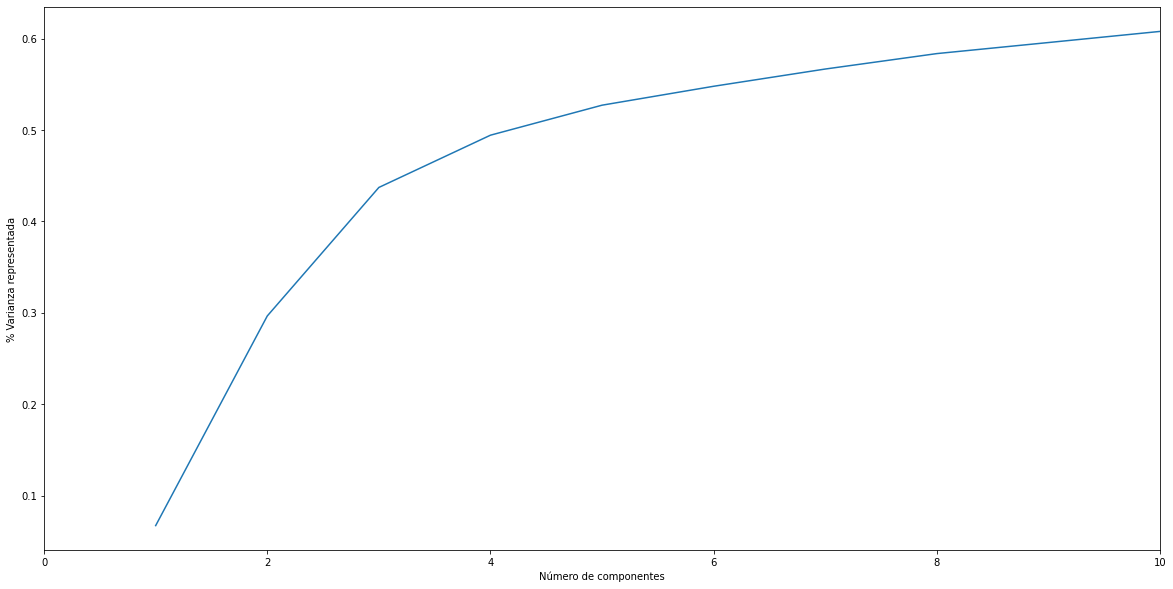

In [ ]:
plt.figure(figsize=(20,10))
plt.plot( range(1,11), perfs_train)
plt.xlabel('Número de componentes')
plt.ylabel('% Varianza representada')
plt.xlim(0,10)

Determinamos así que usaremos 4 componentes para la función NMF.

In [ ]:
# Aplicamos nuevamente la función NMF con 4 componentes
nmf = NMF(n_components = 4, init='random', random_state=0).fit(data)
reduced_data = nmf.transform(data)      # Este sería el equivalente a la matriz W

# Estandarizamos los valores obtenidos
data2 = pd.DataFrame(reduced_data, columns=['C1','C2','C3','C4'])

scaler_reduced_data = StandardScaler(with_mean=False).fit(data2.values).transform(data2.values)

data_scaled = pd.DataFrame(scaler_reduced_data, columns=['C1','C2','C3','C4'])
# reduced_data = nmf.fit_transform(data) 
# data_components = nmf.components_      # equivalente a la matriz H

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [ ]:
data_scaled

,C1,C2,C3,C4
0,0.051840,0.891923,4.968027,0.071789
1,0.098108,2.507956,3.181934,0.224587
2,0.000000,1.364247,3.105026,0.036168
3,0.041445,2.596271,3.311573,0.061914
4,0.076583,0.882663,4.369450,0.178276
...,...,...,...,...
7014,0.010327,3.681267,3.099977,0.004861
7015,0.000000,1.922075,0.723724,0.007667
7016,0.054134,4.500643,2.500622,0.018120
7017,0.000000,1.832753,2.054907,0.000000


Las 130 columnas se encuentran ahora representadas por 4 componentes principales que además están estandarizados.

# Clustering

Volvemos a aplicar el Método del codo pero en esta ocasión para determinar el número óptimo de clusters y haciendo uso de la librería Kmeans y variando nuevamente el número de componentes

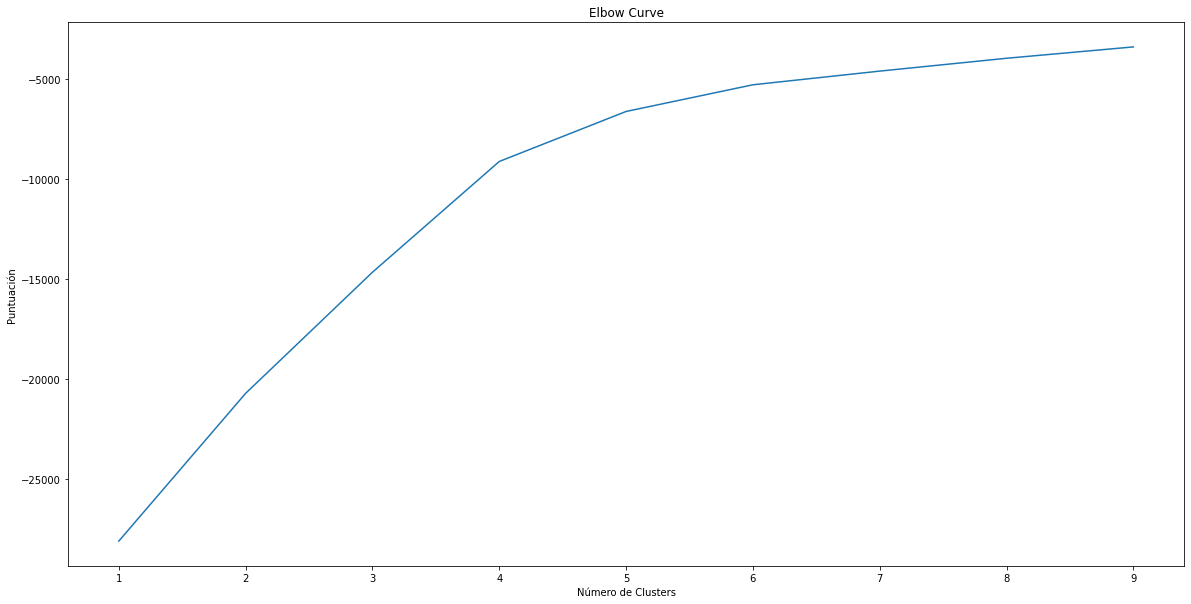

In [ ]:
from sklearn.cluster import KMeans

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(data_scaled).score(data_scaled) for i in range(len(kmeans))]
score
plt.figure(figsize=(20,10))
plt.plot(Nc,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación')
plt.title('Elbow Curve')
plt.show()

Nuevamente encontramos que un número óptimo y apropiado para el número de clusters es 6 que es dónde la gráfica se suaviza casi en su totalidad, además es pertinente elegir este valor y no el 4 por ejemplo debido a la gran cantidad de datos a representar.

Aplicamos el clustering.

In [ ]:
kmeans = KMeans(n_clusters=6,
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0).fit(data_scaled.values)

clusters = kmeans.fit_predict(data_scaled.values)
centroids = kmeans.cluster_centers_
centroids = centroids.T

Visualizamos nuevamente el dataset pero ahora con el cluster al que pertenece.

In [ ]:
data_scaled['Cluster'] = clusters
data_scaled

,C1,C2,C3,C4,Cluster
0,0.051840,0.891923,4.968027,0.071789,5
1,0.098108,2.507956,3.181934,0.224587,5
2,0.000000,1.364247,3.105026,0.036168,5
3,0.041445,2.596271,3.311573,0.061914,5
4,0.076583,0.882663,4.369450,0.178276,5
...,...,...,...,...,...
7014,0.010327,3.681267,3.099977,0.004861,1
7015,0.000000,1.922075,0.723724,0.007667,0
7016,0.054134,4.500643,2.500622,0.018120,1
7017,0.000000,1.832753,2.054907,0.000000,4


Vemos cuántos elementos pertenecen a cada cluster.

In [ ]:
data_scaled.Cluster.value_counts()

4    2508
0    2249
1    1229
5     829
3     134
2      70
Name: Cluster, dtype: int64

Y los graficamos para hacernos una idea de estos, es importante resaltar que como tenemos 4 componentes principales la gráfica debería de ser en 4 dimensiones, pero se ha optado por graficarlo en el plano (C2, C3), debido a que estas componentes son las de mayor relevancia debido a las operaciones que se han hecho hasta el momento.

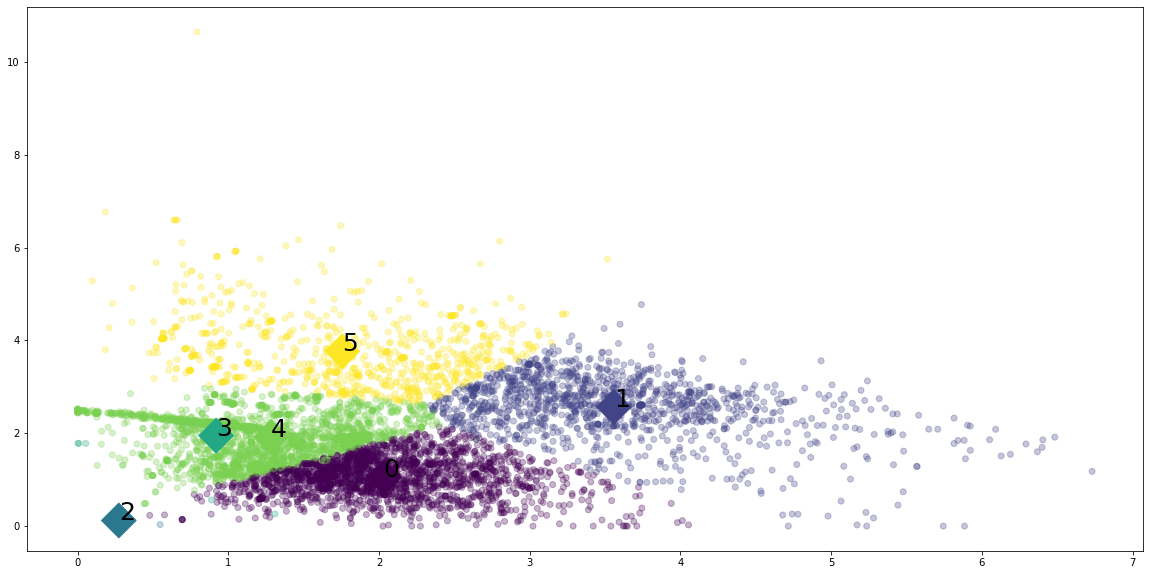

In [ ]:
%matplotlib inline

clusters = ['0', '1', '2', '3', '4', '5']

plt.figure(figsize=(20,10))
plt.scatter(x=data_scaled['C2'], y=data_scaled['C3'], c=data_scaled['Cluster'], alpha = 0.3)
handle = plt.scatter(x=centroids[1], y=centroids[2], c = [ 0, 1, 2, 3, 4, 5], marker='D', s=600)

for i in range(len(centroids.T)):
  plt.text(x=centroids[1][i], y=centroids[2][i], s = '%s' % (clusters[i]), size=25, zorder=1, color='black')

Podemos observar claramente la distinción entre los clusters con su respectivo centroide.

Ahora trataremos de ver la relación de estos clusters con la localización de las instituciones

In [ ]:
data_cualit['Cluster'] = data_scaled['Cluster']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
subset = data_cualit[['instnm', 'latitude', 'longitude', 'Cluster']].sample(n = 500)

In [ ]:
MC = folium.Map(location = [subset['latitude'].mean()	, subset['longitude'].mean()], tiles="Stamen Terrain", zoom_start=4)
# MC = MarkerCluster()

for row in subset.itertuples():
  if row.Cluster == 0:
    MC.add_child(folium.Marker(location = [row.latitude, row.longitude], popup = row.instnm +' Cluster: '+ str(int(row.Cluster)),  icon=folium.Icon(color="green", icon = 'Point')))

  elif row.Cluster == 1:
    MC.add_child(folium.Marker(location = [row.latitude, row.longitude], popup = row.instnm +' Cluster: '+ str(int(row.Cluster)),  icon=folium.Icon(color="blue", icon = 'Point')))

  elif row.Cluster == 2:
    MC.add_child(folium.Marker(location = [row.latitude, row.longitude], popup = row.instnm +' Cluster: '+ str(int(row.Cluster)),  icon=folium.Icon(color="orange", icon = 'Point')))

  elif row.Cluster == 3:
    MC.add_child(folium.Marker(location = [row.latitude, row.longitude], popup = row.instnm +' Cluster: '+ str(int(row.Cluster)),  icon=folium.Icon(color="red", icon = 'Point')))

  elif row.Cluster == 4:
    MC.add_child(folium.Marker(location = [row.latitude, row.longitude], popup = row.instnm +' Cluster: '+ str(int(row.Cluster)),  icon=folium.Icon(color="lightgray", icon = 'Point')))

  elif row.Cluster == 5:
    MC.add_child(folium.Marker(location = [row.latitude, row.longitude], popup = row.instnm +' Cluster: '+ str(int(row.Cluster)),  icon=folium.Icon(color="purple", icon = 'Point')))

# map2.add_child(MC)
MC

De lo anterior podemos observar que el clustering obtenido no tiene mucha relación con la ubicación en que se encuentra la institución, de esta forma la columna 'location' no es significativa. Sin embargo, a continuación se presenta un clustering en tiempo real que se agrupa por ubicación.

In [ ]:
subset.dropna( subset = ['Cluster'], axis = 0, inplace = True)

In [ ]:
map2 = folium.Map(location = [subset['latitude'].mean()	, subset['longitude'].mean()], tiles="Stamen Terrain", zoom_start=4)
MC = MarkerCluster()

for row in subset.itertuples():
    MC.add_child(folium.Marker(location = [row.latitude, row.longitude], popup = row.instnm +' Cluster: '+ str(int(row.Cluster)) ))

map2.add_child(MC)

Luego de ver que la ubicación no es significativa para el cluster obtenido debemos mirar cuáles columnas si lo son, para de esta forma obtener una caracterización de cada cluster.

In [ ]:
data['Cluster'] = data_scaled['Cluster']

In [ ]:
data.corr()

,numbranch,region,locale,pcip01,pcip03,pcip04,pcip05,pcip09,pcip10,pcip11,...,ugds_nra,ugds_unkn,pptug_ef,tuitfte,inexpfte,pctpell,pctfloan,ug25abv,cdr3,Cluster
numbranch,1.000000,0.018952,-0.092553,-0.028725,-0.041361,-0.015586,-0.026508,-0.053119,-0.002054,0.495097,...,-0.071285,0.230919,0.021558,0.205253,-0.071519,0.222064,0.218227,0.258004,0.188161,0.036913
region,0.018952,1.000000,-0.113787,0.011497,-0.032307,0.000214,-0.018731,-0.033232,0.017036,0.013475,...,-0.015089,0.002801,0.018906,-0.116372,-0.105449,0.141401,-0.167559,0.074693,0.078268,0.094712
locale,-0.092553,-0.113787,1.000000,0.098005,0.115672,-0.018789,0.040385,-0.023657,-0.034236,-0.033083,...,-0.034691,-0.093519,0.071062,-0.182839,-0.005656,-0.097965,-0.175543,-0.156104,-0.027777,-0.002750
pcip01,-0.028725,0.011497,0.098005,1.000000,0.081457,0.005755,-0.003080,0.003373,-0.006361,-0.016437,...,0.018173,-0.021089,-0.002102,-0.055321,0.002213,-0.066933,-0.051466,-0.075037,-0.011943,-0.009616
pcip03,-0.041361,-0.032307,0.115672,0.081457,1.000000,0.018530,0.120334,0.044770,-0.013215,-0.021321,...,0.058084,-0.008609,-0.055823,0.027705,0.060883,-0.119172,-0.010829,-0.168010,-0.076537,-0.022845
pcip04,-0.015586,0.000214,-0.018789,0.005755,0.018530,1.000000,0.006190,0.009595,-0.000436,-0.006691,...,0.169195,0.009427,-0.024734,0.070120,0.033067,-0.041402,-0.000377,-0.040436,-0.032119,0.011761
pcip05,-0.026508,-0.018731,0.040385,-0.003080,0.120334,0.006190,1.000000,0.025120,-0.008386,-0.014155,...,0.075931,0.029456,-0.026636,0.059346,0.108962,-0.106092,-0.061625,-0.102803,-0.087384,-0.030600
pcip09,-0.053119,-0.033232,-0.023657,0.003373,0.044770,0.009595,0.025120,1.000000,0.018175,-0.030899,...,0.110040,-0.010996,-0.086783,0.060229,0.035599,-0.128042,0.058959,-0.158433,-0.068072,-0.014775
pcip10,-0.002054,0.017036,-0.034236,-0.006361,-0.013215,-0.000436,-0.008386,0.018175,1.000000,0.031269,...,0.000380,0.030827,-0.000552,0.041392,-0.019915,-0.003774,0.019798,-0.025956,0.054162,0.001579
pcip11,0.495097,0.013475,-0.033083,-0.016437,-0.021321,-0.006691,-0.014155,-0.030899,0.031269,1.000000,...,-0.027525,0.039908,0.064014,0.132118,-0.052459,0.072399,0.066365,0.172224,0.139725,0.012423


In [ ]:
data.dropna( subset = ['Cluster'], axis = 0, inplace = True)

In [ ]:
l = []
correlation3D = []
for i in range(6):
  correlation = data[data['Cluster'] == i].corr()
  s = set()

  for column in correlation.columns:
    value = correlation[column][(abs(correlation[column]) >= 0.6) & (abs(correlation[column]) < 1)]
    if value.size > 0:
      s.add(column)
  print('Colomnas significantes para el Cluster '+str(i)+': '+ str(s))
  l.append(s)
  correlation3D.append(correlation)

Colomnas significantes para el Cluster 0: {'pcip27', 'pcip45', 'pcip40', 'pcip54'}
Colomnas significantes para el Cluster 1: {'pcip27', 'pcip45', 'ugds_black', 'pcip23', 'pcip40', 'pcip16', 'pcip54', 'ugds_white'}
Colomnas significantes para el Cluster 2: {'pcip03', 'pcip45', 'pcip11', 'pcip15', 'ugds_nra', 'pcip42', 'pcip27', 'pcip23', 'ugds_asian', 'pcip40', 'pcip14', 'pcip16', 'pcip26', 'numbranch', 'tuitfte', 'pcip44', 'pcip54', 'pcip13', 'pcip31', 'pcip24', 'pcip39'}
Colomnas significantes para el Cluster 3: {'pcip03', 'pcip11', 'pcip15', 'pcip01', 'pcip27', 'pcip09', 'pcip23', 'pcip40', 'ugds', 'pcip14', 'pcip16', 'pcip41', 'pcip04', 'pcip43', 'pcip05', 'pcip26', 'pcip30', 'numbranch', 'pcip38', 'ugds_aian', 'pcip54'}
Colomnas significantes para el Cluster 4: set()
Colomnas significantes para el Cluster 5: {'pcip27', 'pcip45', 'pcip40', 'pcip26', 'pcip25', 'ugds_nhpi', 'pcip54'}


Como el cluster 4 no resulta tener ninguna correlación fuerte 

In [ ]:
correlation = data[data['Cluster'] == 4].corr()
s = set()

for column in correlation.columns:
    value = correlation[column][(abs(correlation[column]) >= 0.57) & (abs(correlation[column]) < 1)]
    if value.size > 0:
      s.add(column)
print('Colomnas significantes para el Cluster '+str(i)+': '+ str(s))

Colomnas significantes para el Cluster 5: {'pcip27', 'ugds_hisp', 'ugds_white', 'pcip54'}


# Explicación de cada cluster
## Cluster 0
Se puede identificar por el porcentaje de títulos otorgados en:
* Ciencias sociales (pcip45) 
* Ciencias físicas (pcip40)
* Matemática y estadística (pcip27)
* Historia (pcip54).

## Cluster 1

Se puede identificar por:
* ### *Raza** de los estudiantes de pregrado:
  * Negra
  * Blanca

* ### Porcentaje de títulos otorgados en:
  * Ciencias físicas (pcip40)
  * Lenguas extranjeras, literatura y lingüística (pcip16)
  * Lengua y literatura inglesa (pcip23)
  * Matemática y estadística (pcip27)
  * Historia (pcip54)
  * Ciencias sociales (pcip45)

## Cluster 2
Se puede identificar por:
* ### Costo de la matricula
* ### Número de campus
* ### *Raza** de los estudiantes de pregrado:
  * Extranjeros no residentes
  * Asiaticos
* ### Porcentaje de títulos otorgados en:
  * Teología y vocaciones religiosas (pcip39)
  * Ciencias sociales (pcip45)
  * Kinesiología y recreación (pcip31)
  * Conservación y recursos naturales (pcip03)
  * Ingeniería relacionada a técnicas/tecnologías (pcip15) 
  * Artes y ciencias liberales, estudio general y humanidades (pcip24)
  * Psicología (pcip42)
  * Ciencias físicas (pcip40)
  * Lenguas extranjeras, literatura y lingüística (pcip16)
  * Ingeniería (pcip14)
  * Ciencias biológicas y biomédicas (pcip26)
  * Lengua y literatura inglesa (pcip23)
  * Administración pública y profesiones de servicios sociales (pcip44)
  * Ciencias de la información e informática y servicios de soporte (pcip11)
  * Matemática y estadística (pcip27)
  * Educación (pcip13)
  * Ciencias sociales (pcip45) 

## Cluster 3
Se puede identificar por:
* ### Número de estudiantes de pregrado 
* ### Número de campus
* ### *Raza** de los estudiantes de pregrado:
  * Indios americanos y nativos de alaska
* ### Porcentaje de títulos otorgados en:
  * Comunicación, periodismo y programas relacionados (pcip09)
  * Historia (pcip54)
  * Área, estudios étnicos, culturales, de género y grupo (pcip05)
  * Estudios multi/interdisciplinarios (pcip30)
  * Conservación y recursos naturales (pcip03)
  * Ingeniería relacionada a técnicas/tecnologías (pcip15)
  * Filosofía y estudios religiosos (pcip38)
  * Servicios de seguridad nacional, aplicación de la ley, bomberos y servicios de protección relacionados (pcip43)
  * Ciencias físicas (pcip40)
  * Lenguas extranjeras, literatura y lingüística (pcip16)
  * Ciencia agrícola, animal, plantas, veterinaría y campos relacionados (pcip01)
  * Arquitectura y servicios relacionados (pcip04)
  * Ingeniería (pcip14)
  * Ciencias biológicas y biomédicas (pcip26)
  * Lengua y literatura inglesa (pcip23)
  * Ciencias de la información e informática y servicios de soporte (pcip11)
  * Ciencias tecnológicas/técnias (pcip41)
  * Matemática y estadística (pcip27)

## Cluster 4

Se puede identificar por:
* ### *Raza** de los estudiantes de pregrado:
  * Hispano
  * Blanca

* ### Porcentaje de títulos otorgados en:
  * Matemática y estadística (pcip27)
  * Historia (pcip54)

## Cluster 5

Se puede identificar por:
* ### *Raza** de los estudiantes de pregrado:
  * Hawaiano e isleño del pacífico

* ### Porcentaje de títulos otorgados en:
  * Ciencias físicas (pcip40)
  * Ciencias biológicas y biomédicas (pcip26)
  * Ciencia de la biblioteca/bibliotecario (pcip25)
  * Matemática y estadística (pcip27)
  * Historia (pcip54)
  * Ciencias sociales (pcip45)

*La palabra raza está mal empleada principalmente porque no existen las razas humanas, sin embargo en este contexto se usa para diferenciar a los estudiantes por sus características físicas o su lugar de origen.

Después de identificar y explicar las columnas significativas de cada cluster (Excepto del cluster 4 que está vacío) se pueden describir los cluster de la siguiente manera:

**Cluster 0:** Universidad academica, debido a que se relacionan por los porcentajes de títulos que otorgan en áreas del conocimiento relacionados a la investigación academica.

**Cluster 1:** Universidad local estándar, debido a que se relacionan estudiantes del mismo país sin importar su *raza* y se estudian carreras populares.

**Cluster 2:** Universidades de intercambio, se correlacionan por tener estudiantes asiaticos y extranjeros no residentes, tienen diversidad en las áreas de títulos otorgados.

**Cluster 3:** Universidades de indios y de alaska, se correlacionan por tener estudiantes indios americanos y nativos de alaska, tienen diversidad en las áreas de títulos otorgados.

**Cluster 4:** Universidades para hablantes del español, se correlacionan con la *raza* de estudiantes hispanos, por lo que sería buena opción para los hablantes de español estudiar ahí.

**Cluster 5:** Universidades de isleños, se correlacionan por tener estudiantes hawaianos e isleños del pacífico , tienen diversidad en las áreas de títulos otorgados.


# **RESULTADOS**


- Se obtienen 4 clusters que separan las variables más significativas y que se correlacionen entre sí.
- Se presenta una visualización geográfica dinámica de la agrupación de los diferentes clusters en el territorio de Estados Unidos
- Significancia de ubicación de las escuelas en el territorio nacional.



# **CONCLUSIÓN**


- Como primera conclusión se tiene que para este modelo no es significativo la ubicación de las escuelas para su mayor aprovechamiento, esto da a entender que faltan datos de los estudiantes como si se tuvieron que mudar para realizar sus estudios, lugar de residencia del estudiante y otras variables de localización de los estudiantes más que de las escuelas, se considera que un factor importante para tomar la decisión de donde estudiar es si se tiene que mudar o cuánto se debe desplazar el estudiante para tomar sus estudios.
- El modelo nos arroja que los factores más importantes al momento de elegir la mejor escuela para asistir se puede observar que:
  - **Cluster 0:** Las universidades incluidas en este cluster son la mejor elección para estudiantes que estén buscando títulos afines a las ciencias sociales, matemáticas o historia.
  - **Cluster 1:** Las universidades incluidas en este cluster son la mejor elección para estudiantes que estén buscando títulos afines a ciencias sociales y matemáticas, idiomas e historia, además se debe tener en cuenta la raza de estudiante específicamente el color de piel.
  - **Cluster 2:** Las universidades incluidas en este cluster tienen gran variedad de oferta de títulos, por lo que este no es un problema al momento de tomar una decisión, sin embargo, el estudiante debe tener en cuenta características como costo de matrícula, número de campus y la raza específicamente si son extranjeros no residentes o asiáticos.
  - Cluster 3: Las universidades incluidas en este cluster tienen gran variedad de oferta de títulos, por lo que este no es un problema al momento de tomar una decisión, sin embargo, el estudiante debe tener en cuenta características como, número de estudiantes de pregrado, número de campus y la raza específicamente si son indios americanos y nativos de alaska.
  - **Cluster 4:** Las universidades incluidas en este cluster son la mejor elección para estudiantes que estén buscando títulos afines a las exactas e historia, sin embargo, el estudiante debe tener en cuenta características como costo de matrícula, número de campus y la raza específicamente si son hispanos.
  - **Cluster 5:** Las universidades incluidas en este cluster son la mejor elección para estudiantes que estén buscando títulos afines a las ciencias exactas e historia además de tener en cuenta la raza específicamente si es hawaiano o isleño del pacifico.


- Después de analizar detenidamente cada cluster, se puede observar que en 4 de los 6 clusters hay segregación racial, lo que indica que Estados Unidos debe invertir en programas educativos contra el racismo para que esto deje de ser un item a tener en cuanta al moentno de elegir la universidad donde se desea estudiar.
- Para finalizar se concluye que faltaron datos de localización y movilización de los estudiantes para que estos componentes tengan un papel más importante en el modelo. 


# **RECOMENDACIONES**


A la fecha no se cuenta con una única encuesta o base de datos donde se pueda analizar cuál es la mejor universidad para cada estudiante en el país.


Lo que se recomienda es realizar una unificación de diversas encuestas suministradas por el Departamento Administrativo Nacional de Estadística (DANE) como lo son, Saber para Decidir – Sistema nacional de información de demanda laboral, Índice de costos de la educación superior (ICES), Fuerza laboral y educación a estas bases de datos se le puede añadir la información que puede suministrar las universidades del país de sus graduados y demás estadísticos. 
